### New code

### Load Dataset & Handle Missing Values

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats



In [4]:
# Load dataset
file_path = "Myocardial Infarction.csv"  # Change if needed
df = pd.read_csv(file_path)

# Display column names to identify target variable
print("Column Names:", df.columns.tolist())
df.head()


Column Names: ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [6]:
df.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
print(df.head())

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


In [8]:
print(df.tail())

        ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
1695       1         0    0       0

In [9]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)
df


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


### Identify Numerical & Categorical Columns

In [11]:
# Identify numerical & categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fib

- Separate numerical (integer/float) and categorical (object/string) columns.
- Further, classify numerical columns into discrete and continuous based on their unique values.

### Identify Discrete & Continuous Numerical Columns

In [14]:
# Separate numerical columns into discrete and continuous
discrete_cols = [col for col in num_cols if df[col].nunique() < 20]  # Less than 20 unique values
continuous_cols = [col for col in num_cols if df[col].nunique() >= 20]  # 20+ unique values

print("Discrete Numerical Columns:", discrete_cols)
print("Continuous Numerical Columns:", continuous_cols)


Discrete Numerical Columns: ['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'f

###  Boxplot & Histogram for Continuous Columns 
- more than 10 we can treat as continuous

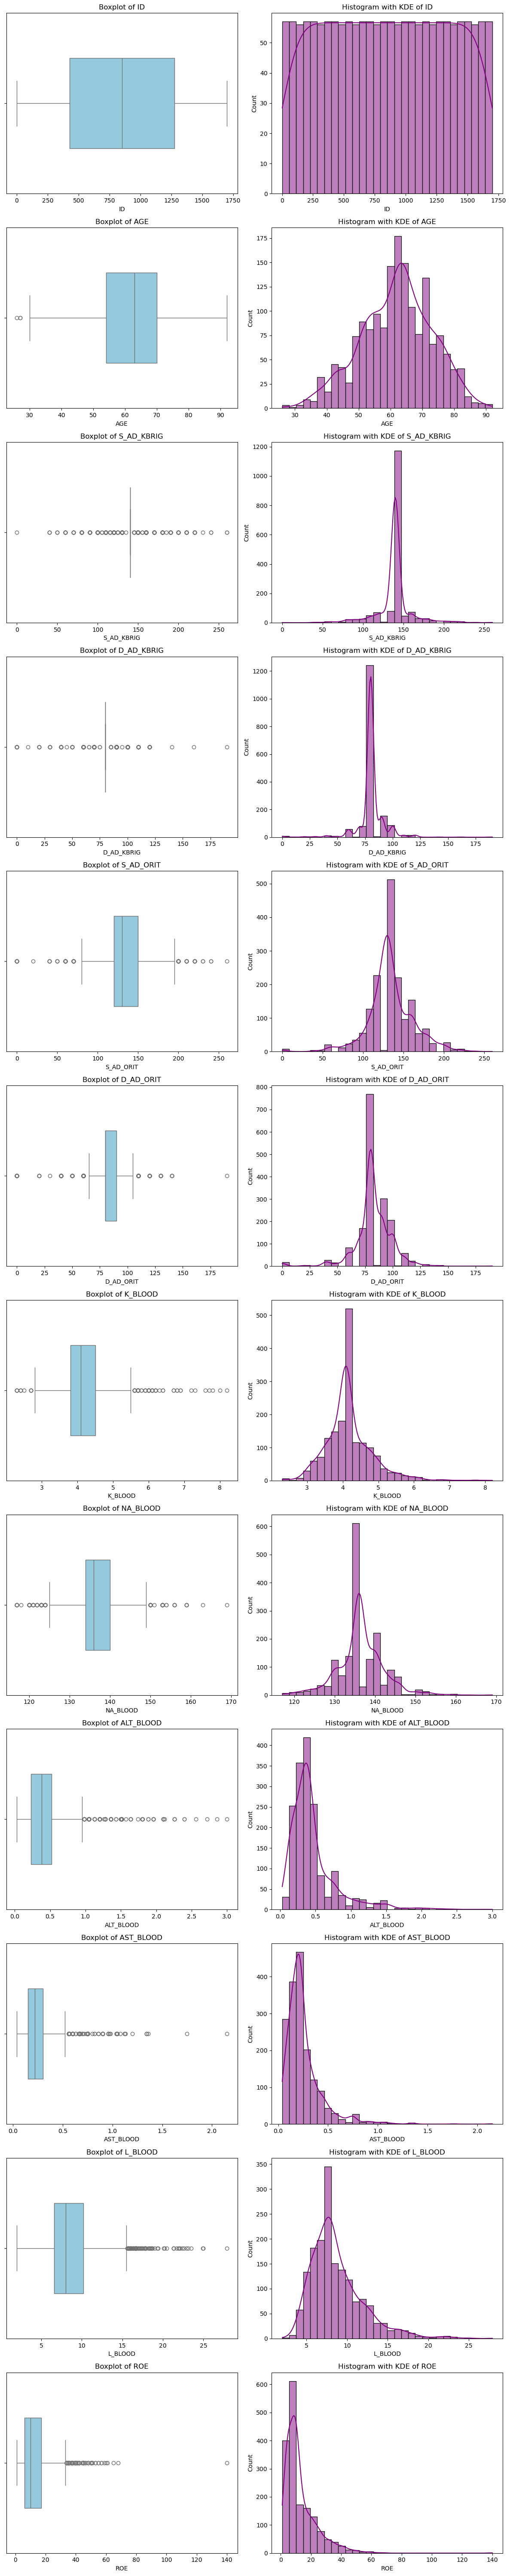

In [16]:
# Boxplot & Histogram for continuous numerical columns
fig, axes = plt.subplots(len(continuous_cols), 2, figsize=(12, 5 * len(continuous_cols)))

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df[col], ax=axes[i, 0], color='skyblue', width=0.5, orient='h')
    axes[i, 0].set_title(f"Boxplot of {col}")

    sns.histplot(df[col], kde=True, ax=axes[i, 1], color='purple', bins=30)
    axes[i, 1].set_title(f"Histogram with KDE of {col}")

plt.tight_layout()
plt.show()


- Boxplot & Histogram: Helps detect outliers and visualize data distribution.

In [39]:
### Heatmap
- Heatmap: Shows correlations between numerical features.

SyntaxError: illegal target for annotation (3953594282.py, line 2)

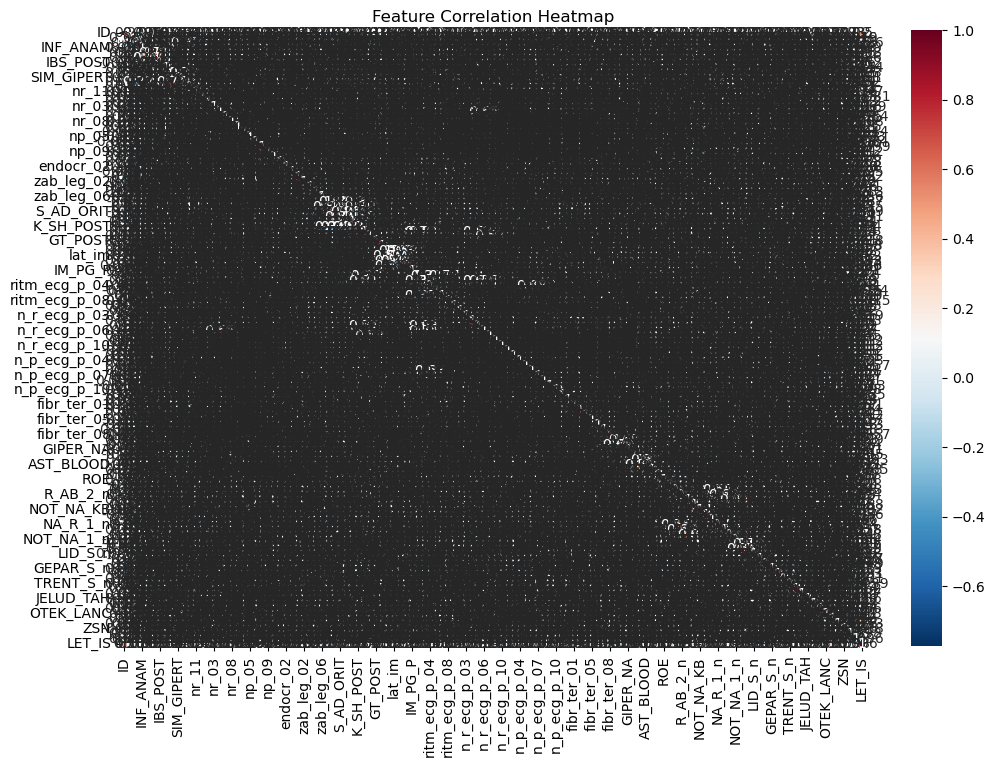

In [38]:
# Selecting only numerical columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu_r', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Q - Q plot

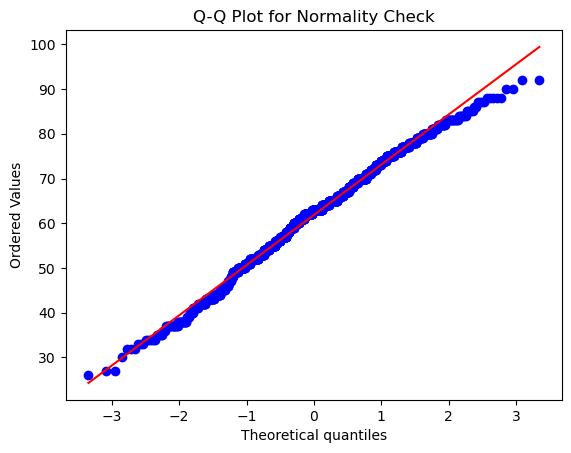

In [36]:
numerical_column = df["AGE"]  
# Q-Q Plot
stats.probplot(numerical_column, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Check")
plt.show()

### One-Hot Encoding for Categorical Columns

In [52]:
# Apply One-Hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Data Shape After Encoding:", df_encoded.shape)


Data Shape After Encoding: (1700, 124)


- Converts categorical variables into numerical format.

### Define Features & Target Variable

In [54]:
# Define features (X) and target variable (y)
target_column = "LET_IS"  # Update based on dataset
if target_column not in df_encoded.columns:
    raise KeyError(f"Column '{target_column}' not found in dataset. Please update the column name.")

X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

print("Feature Set Shape:", X.shape)
print("Target Set Shape:", y.shape)


Feature Set Shape: (1700, 123)
Target Set Shape: (1700,)


### Handle Imbalanced Data

In [56]:
# Handle Imbalanced Data Using Upsampling
df_balanced = pd.concat([X, y], axis=1)

majority_class = df_balanced[df_balanced[target_column] == 0]
minority_class = df_balanced[df_balanced[target_column] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine balanced dataset
df_balanced = pd.concat([majority_class, minority_upsampled])

# Split dataset again
X = df_balanced.drop(columns=[target_column])
y = df_balanced[target_column]
df_balanced

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1554,60.0,1,1.0,3.0,2.0,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1504,1505,74.0,0,0.0,1.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1575,1576,70.0,1,1.0,NaN,NaN,NaN,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1682,1683,61.0,0,1.0,5.0,2.0,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Split & Feature Scaling

In [58]:
# Split dataset into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for continuous variables)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (2286, 123)
Testing Set Shape: (572, 123)


- **Train-Test Split:** Splits the dataset into training (80%) and testing (20%) sets.

### Train Random Forest Model

In [60]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained Successfully!")


Random Forest Model Trained Successfully!


In [62]:
print(rf_model)


RandomForestClassifier(random_state=42)


- if it returns the above one then we can say that our model is trained

In [64]:
print("Feature Importance:\n", rf_model.feature_importances_)


Feature Importance:
 [2.69454154e-01 1.12487261e-02 1.01628507e-03 1.72859888e-03
 8.09515346e-03 7.95875674e-03 1.38978341e-02 0.00000000e+00
 1.15868994e-03 8.29658100e-04 4.51697480e-03 7.93557451e-03
 2.31846967e-04 4.79727952e-05 1.66646984e-05 3.16349823e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.12352266e-04
 1.62507678e-05 0.00000000e+00 1.69340012e-05 2.98838013e-04
 5.24641458e-04 6.42893851e-04 3.13533605e-03 1.32733010e-03
 2.32065219e-04 2.63324964e-04 7.63355995e-04 3.52403860e-04
 8.30176639e-05 9.26679106e-08 7.26132925e-03 1.00781476e-02
 2.14249117e-02 2.51382636e-02 1.46323048e-03 1.06442597e-02
 6.18070266e-04 0.00000000e+00 1.94221066e-05 6.80521750e-05
 4.78747795e-03 9.28821041e-03 1.10343283e-02 3.75277884e-03
 3.79283383e-03 6.10215840e-03 8.49888115e-04 1.06286551e-03
 0.00000000e+00 4.30602946e-03 3.60637716e-04 4.22850539e-03
 1.96760482e-04 1.18438351e-03 7.18531910e-04 7.06445000e-04
 1.16417616e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

## check model predictions

In [66]:
y_pred = rf_model.predict(X_test)
print("Predictions:\n", y_pred[:10])  # Display first 10 predictions


Predictions:
 [1 1 0 1 0 0 1 1 1 1]


In [68]:
y_prob = rf_model.predict_proba(X_test)
print("Prediction Probabilities:\n", y_prob[:5])  # Show first 5 probabilities


Prediction Probabilities:
 [[0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [1.   0.  ]]


### Evaluate model performance

In [70]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9983


## checking classification report

In [72]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



### Cross-Validation 

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean():.4f}")


Cross-Validation Scores: [1.         0.99825175 1.         1.         0.96847636]
Mean Score: 0.9933


### Final Confirmation

In [76]:
print("Baseline Accuracy:", max(y_test.mean(), 1 - y_test.mean()))

Baseline Accuracy: 0.5052447552447552


### Compare with Another Model

In [77]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Model Evaluation

In [79]:
# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))


Random Forest Model Accuracy: 0.9983
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



### Confusion Matrix

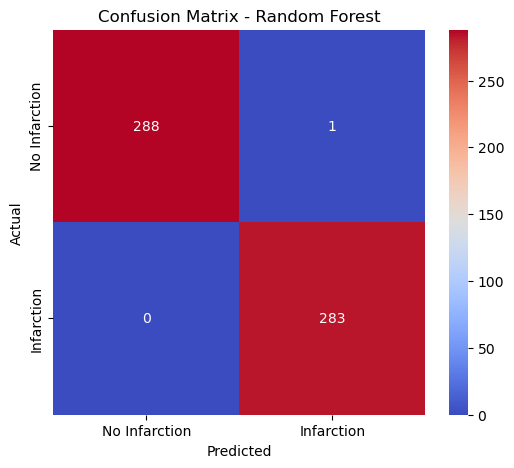

In [81]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=["No Infarction", "Infarction"], yticklabels=["No Infarction", "Infarction"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Feature Importance

C:\Users\akula\AppData\Local\Temp\ipykernel_10680\2767683342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")


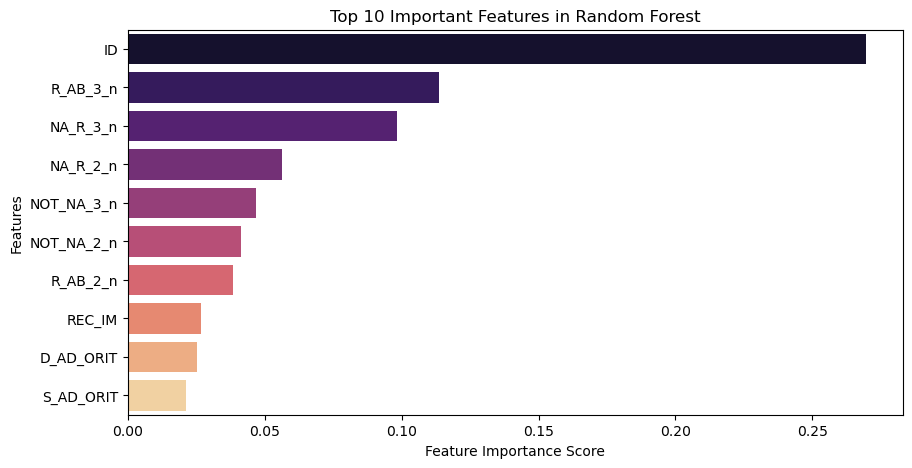

In [83]:
# Feature Importance Plot
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()


### Detect Outliers (Box Plot & Histogram

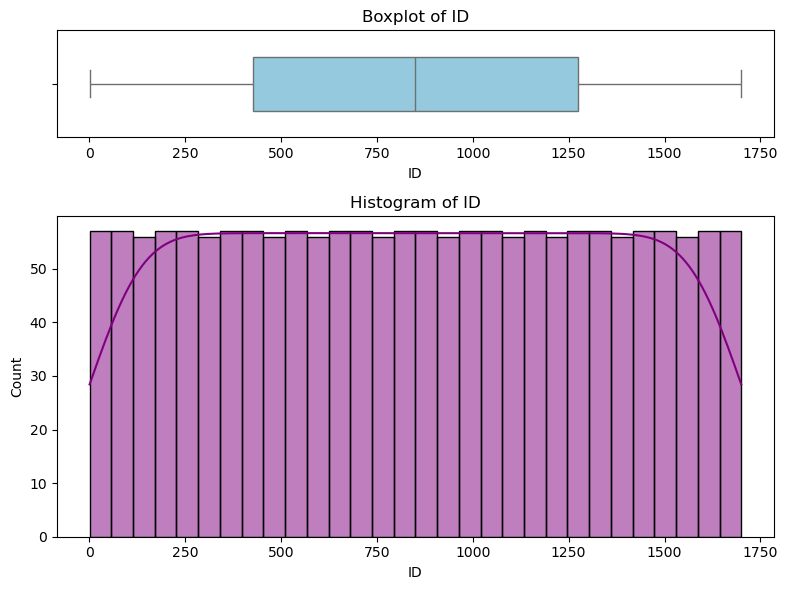

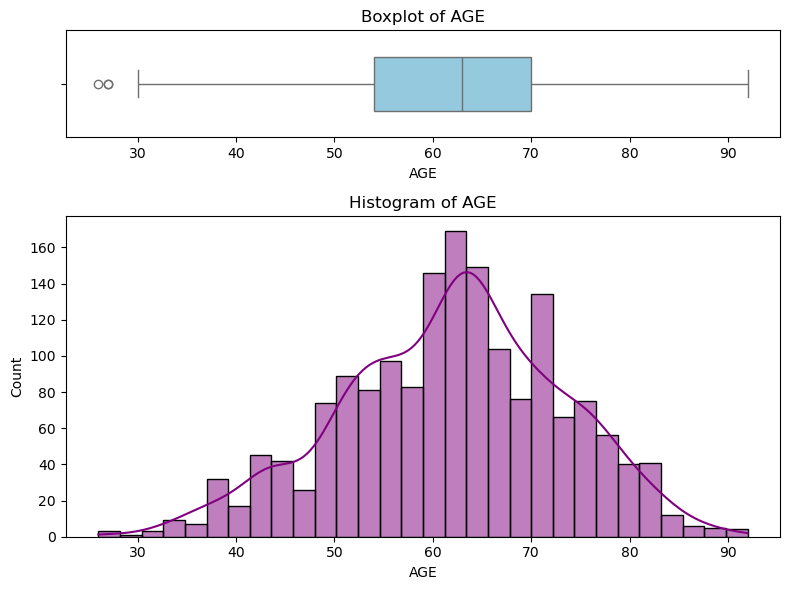

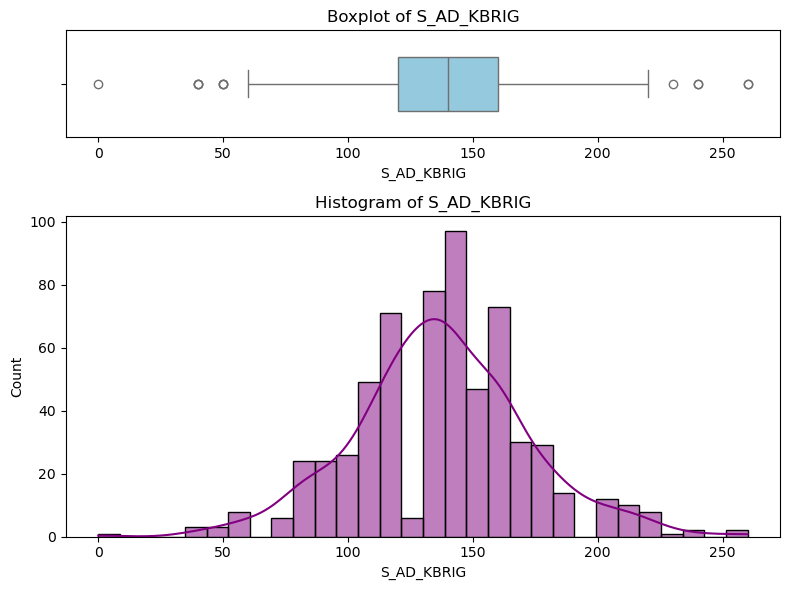

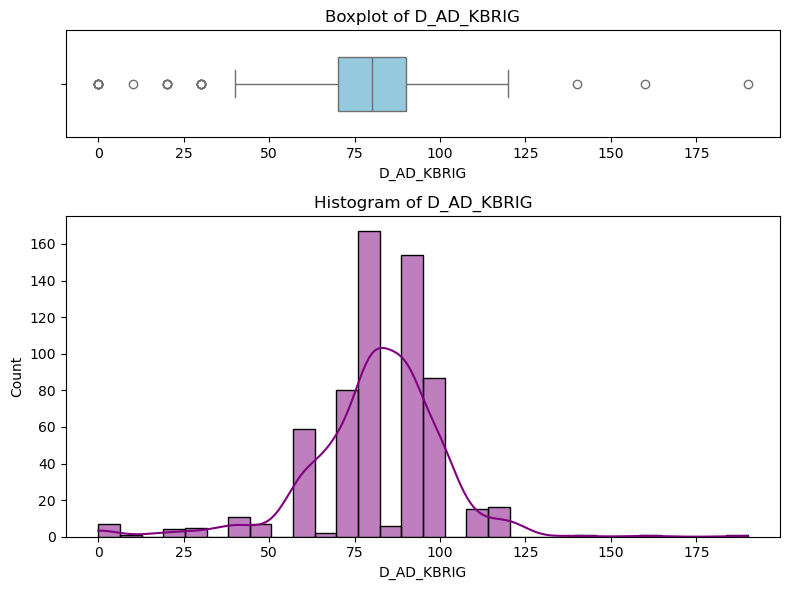

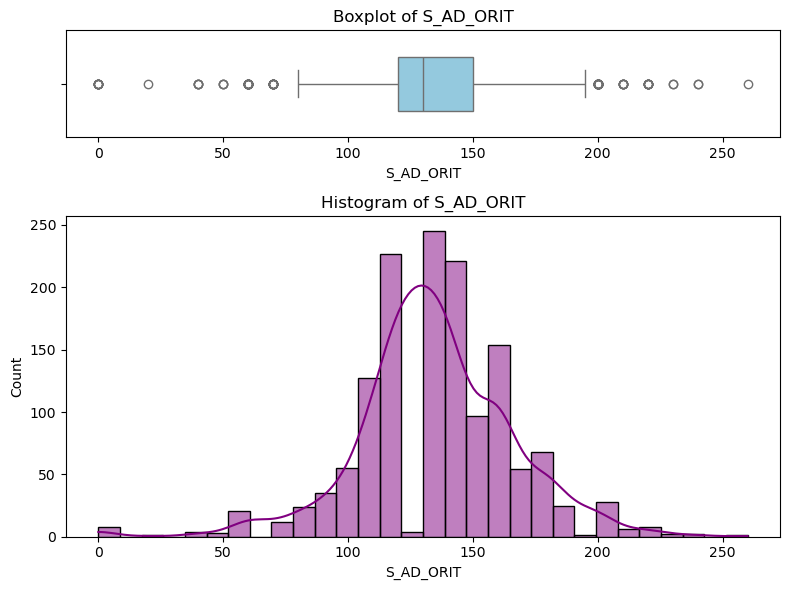

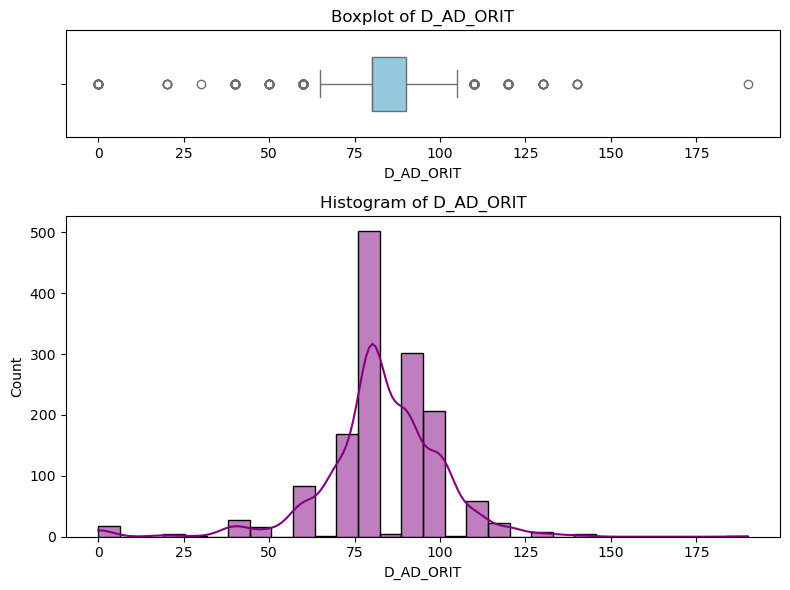

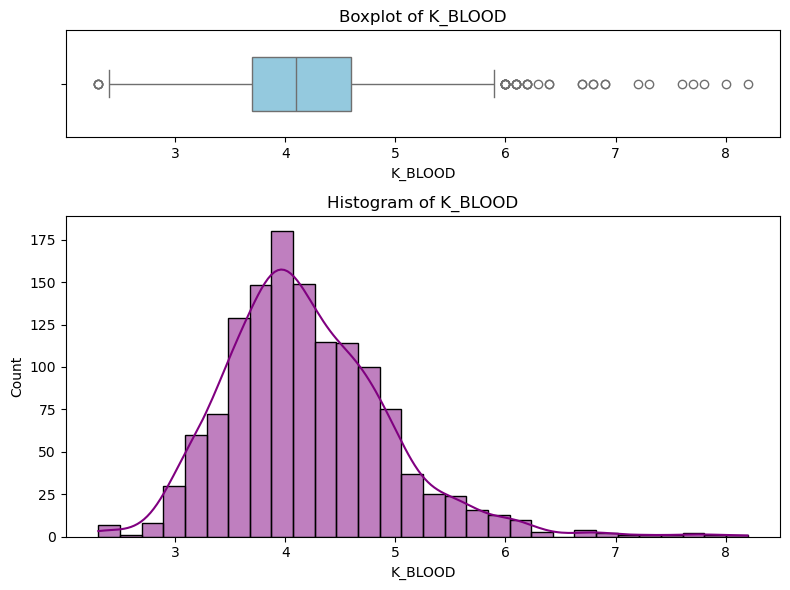

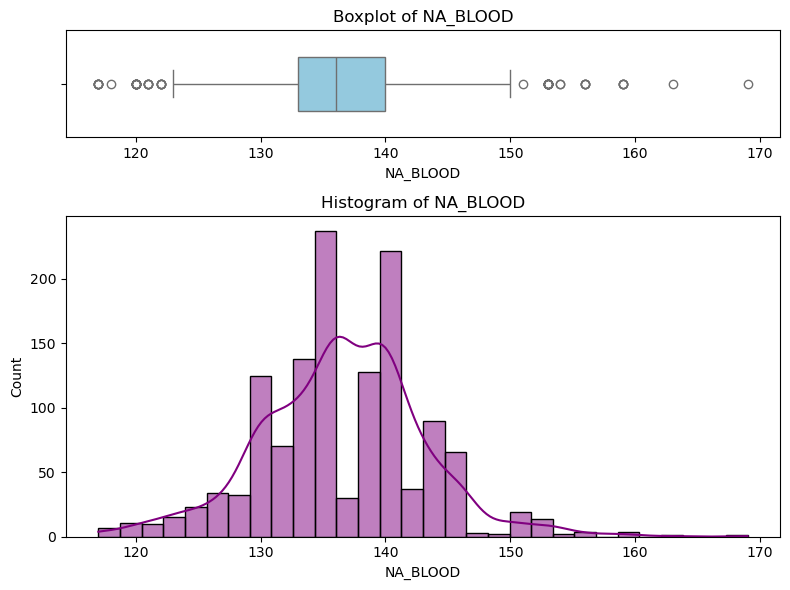

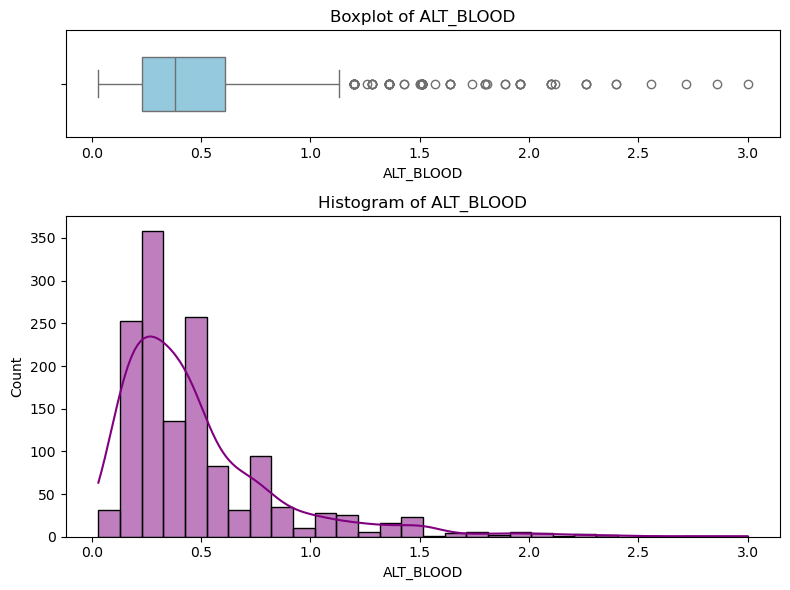

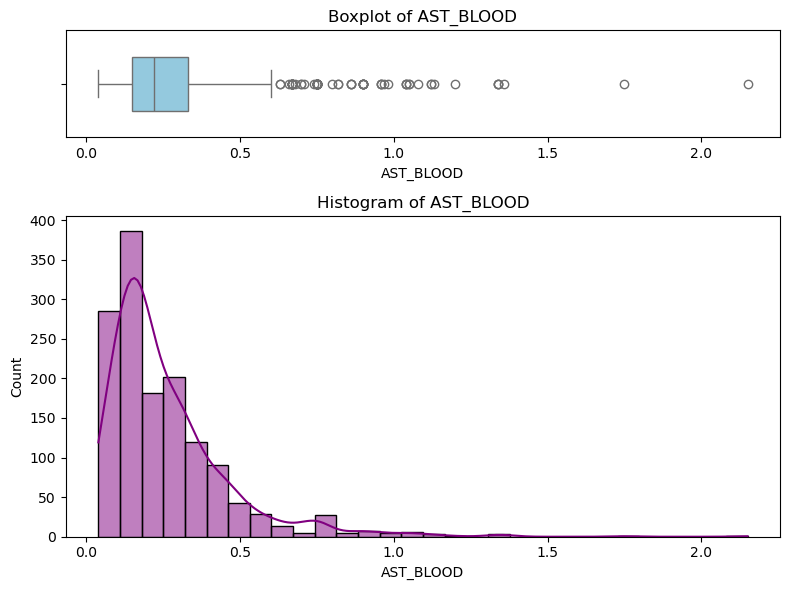

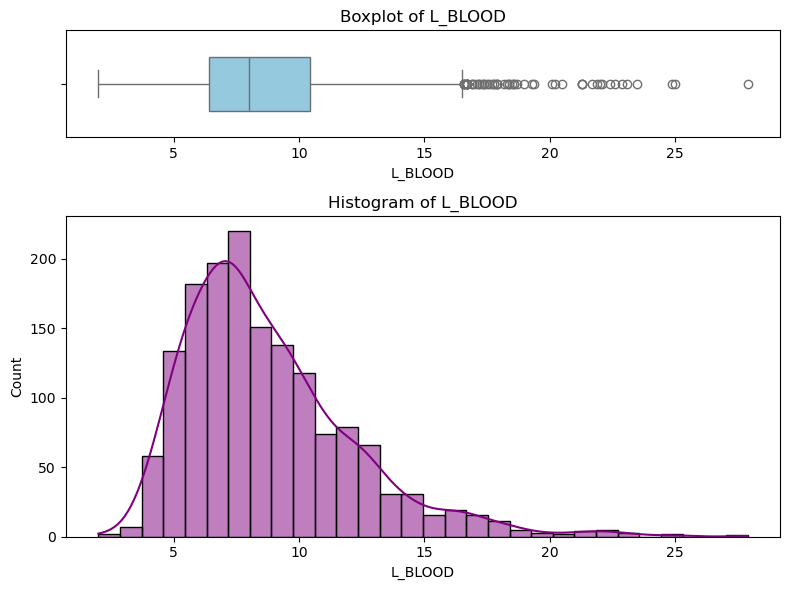

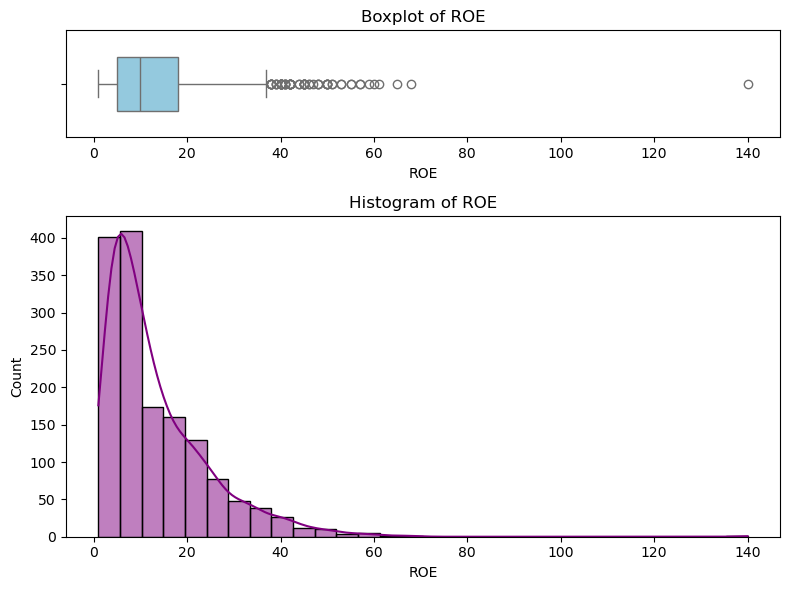

In [85]:
# Plot boxplot & histogram for continuous variables
for col in continuous_cols:
    fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
    
    # Boxplot
    sns.boxplot(data=df[col], ax=axes[0], color='skyblue', width=0.5, orient='h')
    axes[0].set_title(f"Boxplot of {col}")
    
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[1], color='purple', bins=30)
    axes[1].set_title(f"Histogram of {col}")

    # Adjust layout
    plt.tight_layout()
    plt.show()


###  Train the Decision Tree Model

In [87]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

###  Plot the Decision Tree


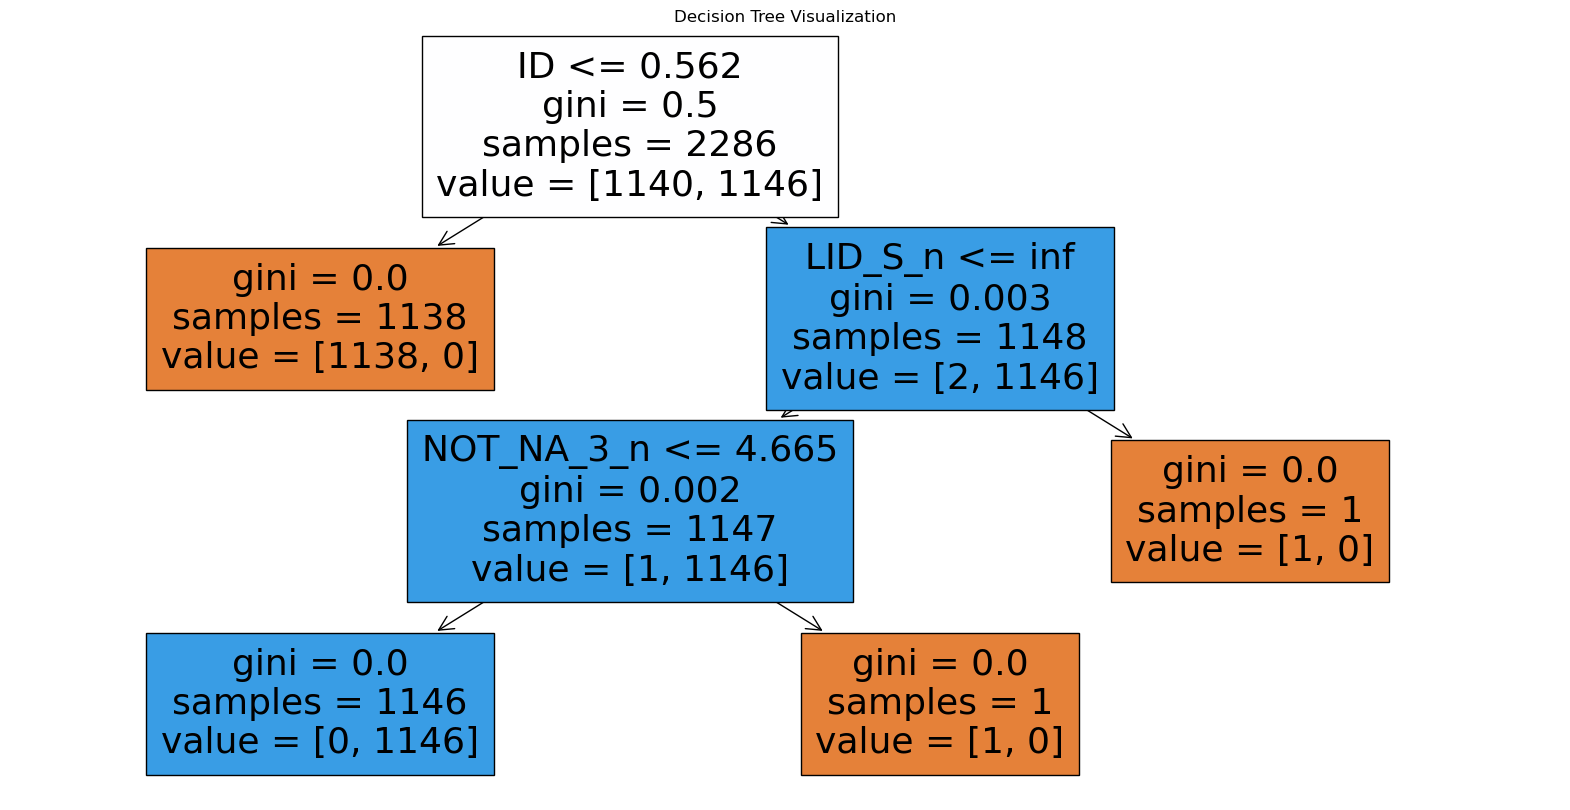

In [89]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


### Print All Missing Values in a List

In [91]:
# Identify columns with missing values and their counts
missing_values = {col: df[col].isnull().sum() for col in df.columns if df[col].isnull().sum() > 0}

# Print missing values in a list format
if missing_values:
    print("Columns with missing values and their count:")
    for col, count in missing_values.items():
        print(f"{col}: {count} missing values")
else:
    print("No missing values found in the dataset.")


Columns with missing values and their count:
AGE: 8 missing values
INF_ANAM: 4 missing values
STENOK_AN: 106 missing values
FK_STENOK: 73 missing values
IBS_POST: 51 missing values
IBS_NASL: 1628 missing values
GB: 9 missing values
SIM_GIPERT: 8 missing values
DLIT_AG: 248 missing values
ZSN_A: 54 missing values
nr_11: 21 missing values
nr_01: 21 missing values
nr_02: 21 missing values
nr_03: 21 missing values
nr_04: 21 missing values
nr_07: 21 missing values
nr_08: 21 missing values
np_01: 18 missing values
np_04: 18 missing values
np_05: 18 missing values
np_07: 18 missing values
np_08: 18 missing values
np_09: 18 missing values
np_10: 18 missing values
endocr_01: 11 missing values
endocr_02: 10 missing values
endocr_03: 10 missing values
zab_leg_01: 7 missing values
zab_leg_02: 7 missing values
zab_leg_03: 7 missing values
zab_leg_04: 7 missing values
zab_leg_06: 7 missing values
S_AD_KBRIG: 1076 missing values
D_AD_KBRIG: 1076 missing values
S_AD_ORIT: 267 missing values
D_AD_ORIT:

In [44]:
# Load the dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Initialize an empty list to store column names with null values
null_columns = []

# Loop through each column and check for null values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        null_columns.append(col)

# Print the list of columns with null values
print("Columns with null values:", null_columns)

Columns with null values: ['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_

In [42]:
print(df.columns)


Index(['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=124)
